# Comparación de Modelos: Regresión Logística vs Árbol de Decisión (Python)

En esta clase realizaremos una comparación entre dos modelos de clasificación binaria:
**Regresión Logística (Logit)** y **Árbol de Decisión**, usando el dataset de cáncer de mama de `sklearn`.

## Paso 1: Importar Librerías

In [28]:
import numpy as np  # Biblioteca para cálculos numéricos y manejo de arrays multidimensionales
import pandas as pd  # Librería para análisis y manipulación de datos en estructuras tipo tabla (DataFrame)
import matplotlib.pyplot as plt  # Herramienta para generar gráficos en 2D como líneas, barras y dispersión
import seaborn as sns  # Biblioteca basada en matplotlib para visualizaciones estadísticas más atractivas

from sklearn.datasets import load_breast_cancer  # Carga el dataset de cáncer de mama de sklearn
from sklearn.model_selection import train_test_split  # Divide el dataset en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Importa el modelo de regresión logística (logit)
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de árbol de decisión

from sklearn.metrics import (  # Métricas para evaluar el rendimiento de los modelos
    confusion_matrix,         # Crea la matriz de confusión: TP, FP, FN, TN
    classification_report,    # Genera métricas como precisión, recall y F1-score
    roc_curve,                # Calcula la curva ROC (tasa de verdaderos positivos vs falsos positivos)
    auc,                      # Calcula el área bajo la curva ROC (AUC)
    RocCurveDisplay           # Herramienta para graficar la curva ROC fácilmente
)


## Paso 2: Cargar y Explorar los Datos

In [20]:
# Cargar el dataset de cáncer de mama desde sklearn
data = load_breast_cancer() # Devuelve un objeto tipo diccionario con datos, etiquetas y metadatos

# Convertimos los datos (features) a un DataFrame de pandas y asignamos nombres de columnas
X = pd.DataFrame(data.data, columns=data.feature_names)  # X contiene las 30 variables predictoras (características)

# Extraemos la variable objetivo (0 = maligno, 1 = benigno) y la guardamos como una Serie de pandas
y = pd.Series(data.target, name="target")  # y contiene los diagnósticos de cada muestra

# Mostramos estadísticas descriptivas del DataFrame X: media, desviación, percentiles, min y max de cada variable
print(X.describe())

# Contamos cuántos ejemplos hay de cada clase (0: maligno, 1: benigno)
print(y.value_counts())  # Útil para detectar si el dataset está balanceado

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

# 📊 Dataset de Cáncer de Mama - Wisconsin (Breast Cancer Dataset)

Este dataset proviene del Wisconsin Diagnostic Breast Cancer (WDBC). Se utiliza para problemas de clasificación binaria.

---

## 🧬 Información general

- **Número de muestras**: 569
- **Número de características (variables)**: 30
- **Variable objetivo (target)**: Diagnóstico del tumor
  - `0`: **Maligno**
  - `1`: **Benigno**

---

## 🎯 Variable Objetivo: `target`

| Valor | Diagnóstico         |
|-------|---------------------|
| 0     | Maligno (canceroso) |
| 1     | Benigno (no canceroso) |

---

## 🔠 Descripción de las Variables Predictoras

Cada variable se calcula a partir de una imagen digitalizada de una muestra de tejido.  
Para 10 atributos básicos, se generan 3 tipos de métricas:
- **Media (`mean`)**
- **Error estándar (`error`)**
- **Peor valor (`worst`)**

---

### 🔟 Atributos Básicos

| Atributo         | Descripción                                                                 |
|------------------|-----------------------------------------------------------------------------|
| Radius           | Promedio de la distancia desde el centro del tumor hasta su perímetro       |
| Texture          | Desviación estándar de los valores de gris en la imagen                     |
| Perimeter        | Perímetro del tumor                                                         |
| Area             | Área del tumor                                                              |
| Smoothness       | Variación local del contorno (entre más baja, más suave es la superficie)   |
| Compactness      | (Perímetro² / Área) - 1.0 (indica qué tan compacto es el tumor)             |
| Concavity        | Severidad de los contornos cóncavos                                         |
| Concave points   | Número de puntos cóncavos en el contorno                                    |
| Symmetry         | Simetría del tumor                                                          |
| Fractal dimension| Dimensión fractal del contorno (complejidad del borde)                      |

---

## 📋 Lista completa de variables

### ➤ Variables tipo `mean` (promedios)
- `mean radius`
- `mean texture`
- `mean perimeter`
- `mean area`
- `mean smoothness`
- `mean compactness`
- `mean concavity`
- `mean concave points`
- `mean symmetry`
- `mean fractal dimension`

### ➤ Variables tipo `error` (error estándar)
- `radius error`
- `texture error`
- `perimeter error`
- `area error`
- `smoothness error`
- `compactness error`
- `concavity error`
- `concave points error`
- `symmetry error`
- `fractal dimension error`

### ➤ Variables tipo `worst` (valores más extremos)
- `worst radius`
- `worst texture`
- `worst perimeter`
- `worst area`
- `worst smoothness`
- `worst compactness`
- `worst concavity`
- `worst concave points`
- `worst symmetry`
- `worst fractal dimension`

---

## 📈 Aplicaciones del dataset

Este dataset es ideal para:
- Modelos de clasificación binaria
- Comparar algoritmos como:
  - Regresión Logística
  - Árboles de Decisión


---


In [42]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Paso 3: Particionar los Datos

La partición de los datos en conjuntos de entrenamiento y prueba es fundamental en machine learning porque permite evaluar de forma objetiva la capacidad del modelo para generalizar a datos nuevos. Si un modelo se entrena y evalúa sobre el mismo conjunto, corre el riesgo de memorizar los datos (sobreajuste) en lugar de aprender patrones reales. Al separar un subconjunto exclusivo para prueba, se simula cómo se comportaría el modelo en un entorno real, garantizando que las métricas obtenidas reflejen su verdadero desempeño. Además, usar una semilla aleatoria asegura que esta división sea reproducible, lo que es esencial para comparar modelos de manera justa y transparente.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Paso 4: Entrenar los Modelos

### Por qué es importante usar semillas 

Asegura que la partición sea reproducible.
Si tú o un estudiante corre el código varias veces, obtendrán el mismo resulatdo
Ideal para clases, investigación o pruebas controladas.

In [24]:
# 🔹 Modelo de Regresión Logística (Logit)
log_model = LogisticRegression(max_iter=10000)  
# Creamos el modelo logístico. Se establece max_iter=10000 para asegurar que el algoritmo converge,
# especialmente cuando hay muchas variables o los datos requieren más iteraciones.

log_model.fit(X_train, y_train) # Entrenamos el modelo usando los datos de entrenamiento. Aquí el modelo "aprende" la relación entre las variables X e y.
y_pred_log = log_model.predict(X_test)  # Generamos predicciones de clase (0 o 1) sobre el conjunto de prueba. Esto es lo que el modelo cree que es la clase verdadera.

y_proba_log = log_model.predict_proba(X_test)[:, 1]  # Obtenemos las probabilidades predichas de que la clase sea "1" (benigno). 
# Esto se usa para calcular curvas ROC, métricas de umbral, etc.

# 🔸 Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)  # Creamos el árbol de decisión. Usamos random_state para que los resultados sean reproducibles.
tree_model.fit(X_train, y_train)  # Entrenamos el árbol con los datos de entrenamiento. El árbol genera reglas basadas en divisiones de los datos.

y_pred_tree = tree_model.predict(X_test)  
# Realizamos predicciones de clase (0 o 1) sobre los datos de prueba usando el árbol entrenado.

y_proba_tree = tree_model.predict_proba(X_test)[:, 1]  
# Extraemos la probabilidad predicha de que la clase sea "1". 
# Igual que en el logit, esto sirve para métricas como AUC o análisis de umbrales de decisión.

## Paso 5: Curvas ROC y AUC

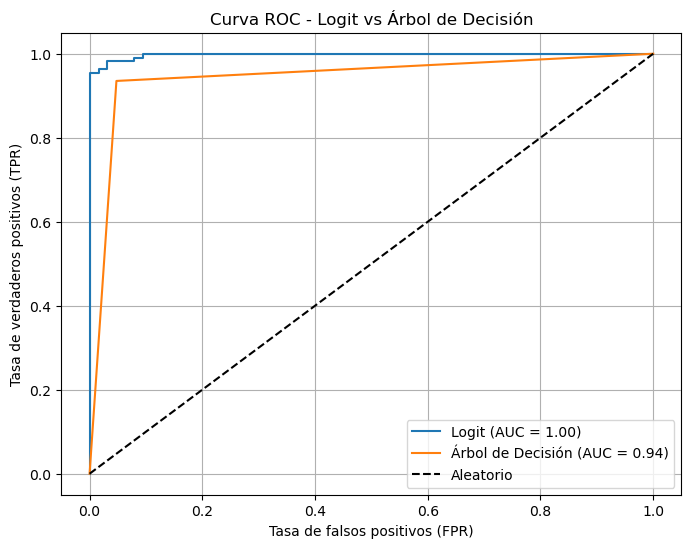

In [30]:
# Calcular los puntos para la curva ROC del modelo Logit
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)  # Falsos positivos y verdaderos positivos para cada umbral
roc_auc_log = auc(fpr_log, tpr_log)  # Área bajo la curva ROC para el modelo logit

# Calcular los puntos para la curva ROC del modelo Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Crear una sola figura para mostrar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Dibujar curva ROC para el modelo Logit
plt.plot(fpr_log, tpr_log, label=f"Logit (AUC = {roc_auc_log:.2f})")

# Dibujar curva ROC para el modelo Árbol
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de Decisión (AUC = {roc_auc_tree:.2f})")

# Agregar línea diagonal de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

# Configurar la gráfica
plt.title("Curva ROC - Logit vs Árbol de Decisión")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Paso 6: Matriz de Confusión y Métricas

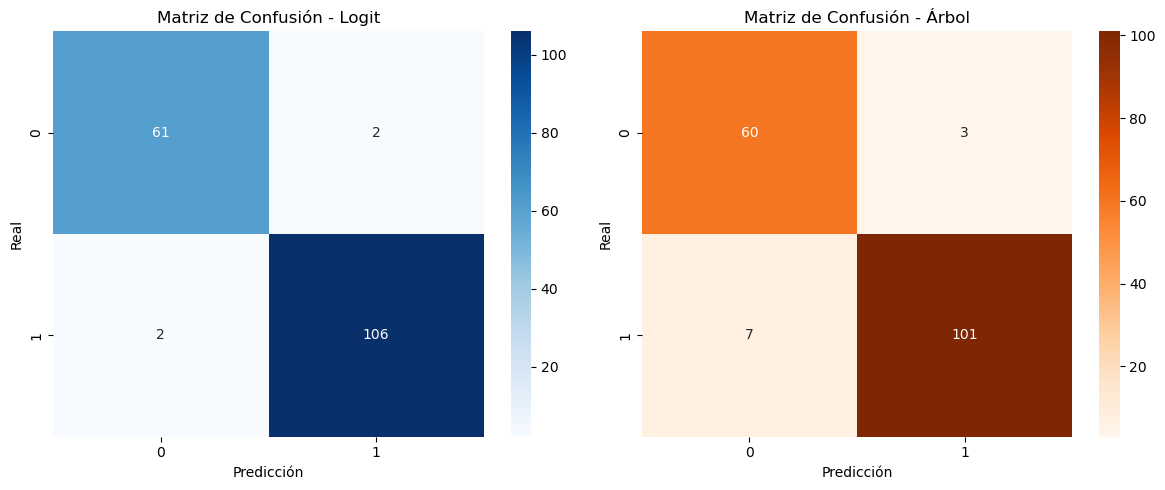

In [32]:
conf_log = confusion_matrix(y_test, y_pred_log)
conf_tree = confusion_matrix(y_test, y_pred_tree)

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Matriz de Confusión - Logit")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Real")

sns.heatmap(conf_tree, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Matriz de Confusión - Árbol")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

## Paso 7: Comparación de Métricas en Tabla

In [34]:
df_comp = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision clase 1", "Recall clase 1", "F1-score clase 1", "F1-score macro"],
    "Logit": [
        report_log["accuracy"],
        report_log["1"]["precision"],
        report_log["1"]["recall"],
        report_log["1"]["f1-score"],
        report_log["macro avg"]["f1-score"]
    ],
    "Árbol de Decisión": [
        report_tree["accuracy"],
        report_tree["1"]["precision"],
        report_tree["1"]["recall"],
        report_tree["1"]["f1-score"],
        report_tree["macro avg"]["f1-score"]
    ]
})

print(df_comp)

             Métrica     Logit  Árbol de Decisión
0           Accuracy  0.976608           0.941520
1  Precision clase 1  0.981481           0.971154
2     Recall clase 1  0.981481           0.935185
3   F1-score clase 1  0.981481           0.952830
4     F1-score macro  0.974868           0.937954


## Conclusión

- El modelo **logit** es más estable y con menor tasa de falsos negativos.
- El **árbol de decisión** puede capturar relaciones no lineales pero es más propenso al sobreajuste.

**Ambos modelos son útiles dependiendo del contexto.**

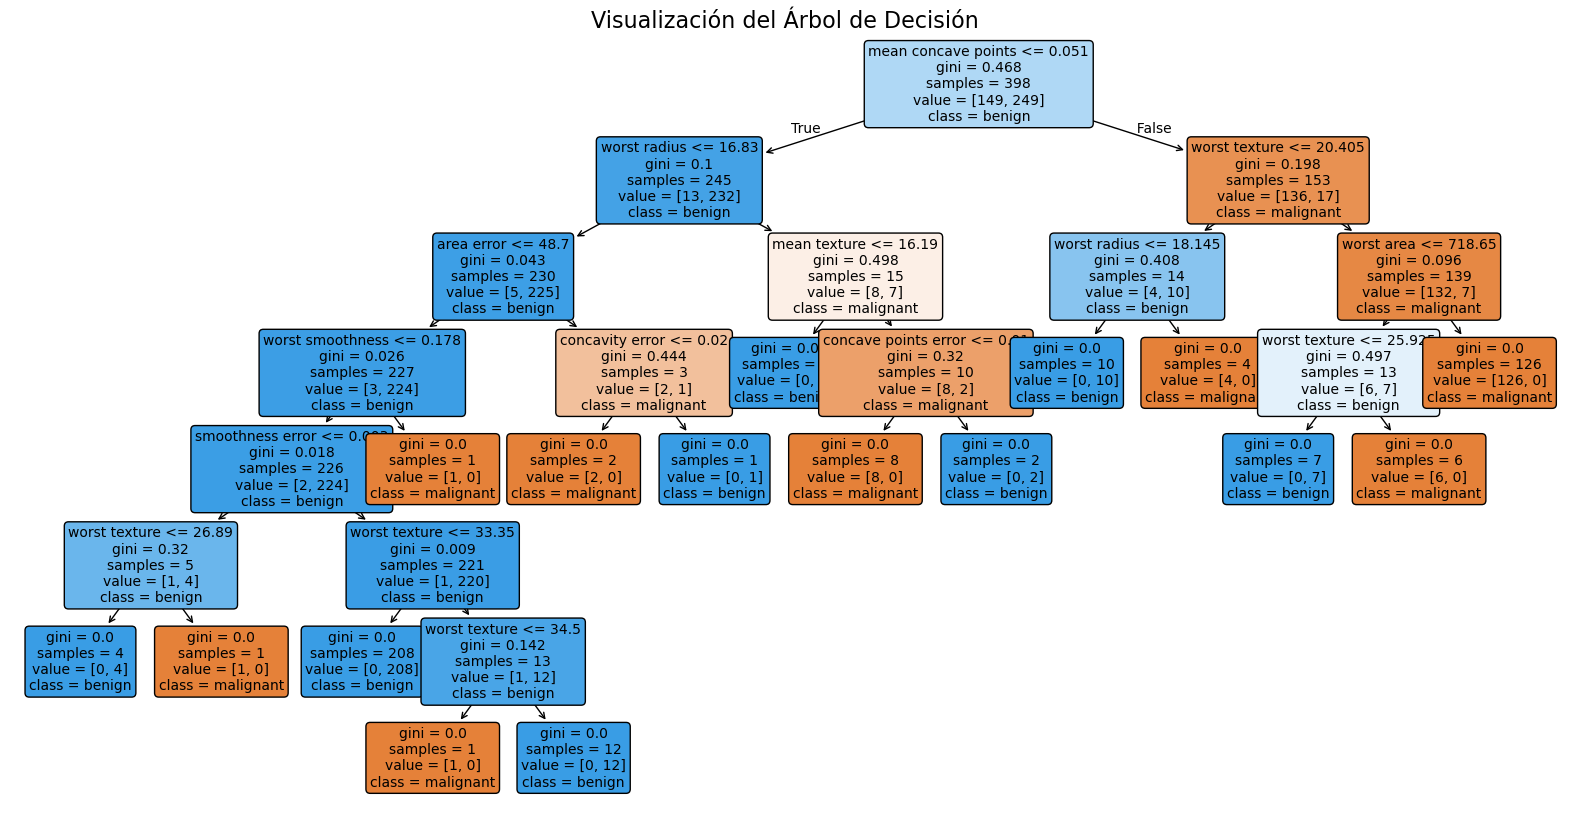

In [47]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Partir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura
plot_tree(
    tree_model,
    feature_names=data.feature_names,  # Nombres de las variables
    class_names=data.target_names,     # Nombres de las clases (benigno, maligno)
    filled=True,                       # Colorear los nodos según la clase
    rounded=True,                      # Bordes redondeados
    fontsize=10                        # Tamaño de la fuente en los nodos
)
plt.title("Visualización del Árbol de Decisión", fontsize=16)
plt.show()


## Un árbol de decisión trabaja dividiendo los datos en ramas basadas en preguntas binarias sobre las variables predictoras, con el objetivo de separar las clases de la forma más pura posible en cada nodo. Comienza en un nodo raíz y, en cada paso, elige la variable y el umbral que mejor separan las clases según una métrica de impureza (como Gini o entropía). A medida que se crean divisiones, se forman nodos internos que representan decisiones y hojas finales que contienen la predicción de clase. Este proceso continúa hasta que se cumplen ciertos criterios de parada

In [49]:
import pandas as pd

# Asegúrate de tener estos valores previamente generados:
# y_test, y_pred_log, y_proba_log, y_pred_tree, y_proba_tree

# Crear una copia del conjunto de prueba
df_resultados = X_test.copy()

# Agregar variable real
df_resultados["Real"] = y_test.values

# Resultados del modelo Logit
df_resultados["Logit_Pred"] = y_pred_log
df_resultados["Logit_Prob_benigno"] = y_proba_log  # Probabilidad clase 1

# Resultados del modelo Árbol de Decisión
df_resultados["Arbol_Pred"] = y_pred_tree
df_resultados["Arbol_Prob_benigno"] = y_proba_tree  # Probabilidad clase 1

# Exportar a archivo Excel
df_resultados.to_excel("resultados_modelos_logit_arbol.xlsx", index=False)

# También podrías exportar como CSV si lo prefieres
# df_resultados.to_csv("resultados_modelos_logit_arbol.csv", index=False)